In [78]:
import os
import csv
import json
from collections import defaultdict
import matplotlib.pyplot as plt

In [14]:
# Refactoring operations
tmp = ["Move Method", "Move Field", "Extract Class", "Push Down Field", "Push Down Method", "Extract Sub Class",\
       "Pull Up Field", "Pull Up Method", "Extract Super Class", "Encapsulate Field", "Increase Field Security",\
       "Decrease Field Security", "Increase Method Security", "Decrease Method Security"]

refactoring_operations = [refop.lower().replace(" ", "") for refop in tmp]



In [40]:
# read all the important features per objective 
files = [open(f"./feature_ranking/{f}") for f in list(os.walk('./feature_ranking/'))[0][2]]

project_refop_ranking = defaultdict(lambda : defaultdict(list))

file_num = 1
for file in files: 
    csvreader = csv.reader(file)
    for line in csvreader: 
        for refop in line: 
            if refop in refactoring_operations: 
                project_refop_ranking[file_num][line[0]].append(refop)
    file_num += 1 
for file in files: 
    file.close()

project_refop_ranking = json.loads(json.dumps(project_refop_ranking))


In [132]:
# k-consistency 

# a refactoring-operation-based rule (reop is important for improving qmood x) is consistent if it is present
# in top k important ref ops of qmood x for all projects
# consistency is per qmood

def calculate_consistency(max_neg_count = 2):
    
    consistency_atK = {'Effectiveness': defaultdict(int),\
                    'Extendibility': defaultdict(int),\
                    'Flexibility': defaultdict(int),\
                    'Functionality': defaultdict(int),\
                    'Reusability': defaultdict(int),\
                    'Understandability': defaultdict(int)}
    
    for K in range(1, 20): 
        
        consistent_rules  = {'Effectiveness': list(),\
                    'Extendibility': list(),\
                    'Flexibility': list(),\
                    'Functionality': list(),\
                    'Reusability': list(),\
                    'Understandability': list()}
        for rule in refactoring_operations: 
            is_consistent = defaultdict(lambda : True)
            for qmood in consistent_rules.keys():
                neg_count = 0
                for rank in project_refop_ranking.values(): 
                        if qmood not in rank.keys():
                            continue

                        if rule not in rank[qmood][:K]:
                            neg_count += 1
                            if neg_count > max_neg_count: 
                                is_consistent[qmood] = False
                                break
                                
            for qmood in consistent_rules.keys():
                if is_consistent[qmood]:
                    consistent_rules[qmood].append(rule)

            for qmood in consistency_atK.keys(): 
                consistency_atK[qmood][K] = len(consistent_rules[qmood])
                
    return (consistent_rules, consistency_atK)
                
consistent_rules, consistency_atK = calculate_consistency()


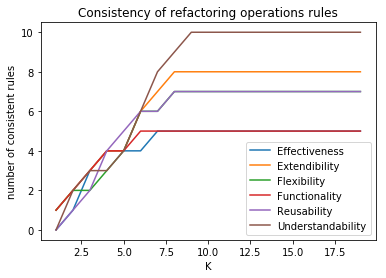

In [133]:
for qmood in consistency_atK.keys(): 
    X, Y = [], []
    for kvalue, num_consistent_rules in consistency_atK[qmood].items():
        X.append(kvalue)
        Y.append(num_consistent_rules)
    plt.plot(X, Y)
plt.title("Consistency of refactoring operations rules")
plt.xlabel("K")
plt.ylabel("number of consistent rules")
plt.legend((consistency_atK.keys()))
plt.show()